<a href="https://colab.research.google.com/github/dsaint31x/SS/blob/master/SS_convolve_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import fftpack
from scipy import signal

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# h = np.array([1/5,1/5,1/5,1/5,1/5])
h = np.ones(4)
h = 1/4 * h
x = np.array([1,0,1,0,1,0,1,0])
# x = np.array([2,1,0,1,2,1,0,1,2,1,0,1])
y_full  = np.convolve(x,h,mode='full') #, method='direct')
y_valid = np.convolve(x,h,mode='valid')#, method='direct')
y_same  = np.convolve(x,h,mode='same') #, method='direct')

print(f'len(h)={len(h)}, len(x)={len(x)}')
print(f'full mode : {len(y_full)}, valid mode : {len(y_valid)}, same mode : {len(y_same)}')
print(f'full : y={np.round(y_full,4)}')
print(f'valid: y={np.round(y_valid,4)}')
print(f'same : y={np.round(y_same,4)}')

len(h)=4, len(x)=8
full mode : 11, valid mode : 5, same mode : 8
full : y=[0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.  ]
valid: y=[0.5 0.5 0.5 0.5 0.5]
same : y=[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25]


In [ ]:
# h = np.array([1/5,1/5,1/5,1/5,1/5])
h = np.ones(4)
h = 1/4 * h
x = np.array([1,0,1,0,1,0,1,0])
# x = np.array([2,1,0,1,2,1,0,1,2,1,0,1])
y_full  = signal.convolve(x,h,mode='full' , method='direct')
y_valid = signal.convolve(x,h,mode='valid', method='direct')
y_same  = signal.convolve(x,h,mode='same' , method='direct')

print(f'len(h)={len(h)}, len(x)={len(x)}')
print(f'full mode : {len(y_full)}, valid mode : {len(y_valid)}, same mode : {len(y_same)}')
print(f'full : y={np.round(y_full,4)}')
print(f'valid: y={np.round(y_valid,4)}')
print(f'same : y={np.round(y_same,4)}')

len(h)=4, len(x)=8
full mode : 11, valid mode : 5, same mode : 8
full : y=[0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25 0.25 0.  ]
valid: y=[0.5 0.5 0.5 0.5 0.5]
same : y=[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.25]


amplitude of high freq. comp.: 0.5
amplitude of DC comp.        : 0.5
amplitude of high freq. comp.: 0.0
amplitude of DC comp.        : 0.5
gain of high freq. comp. :0.0
gain of DC comp.         :1.0


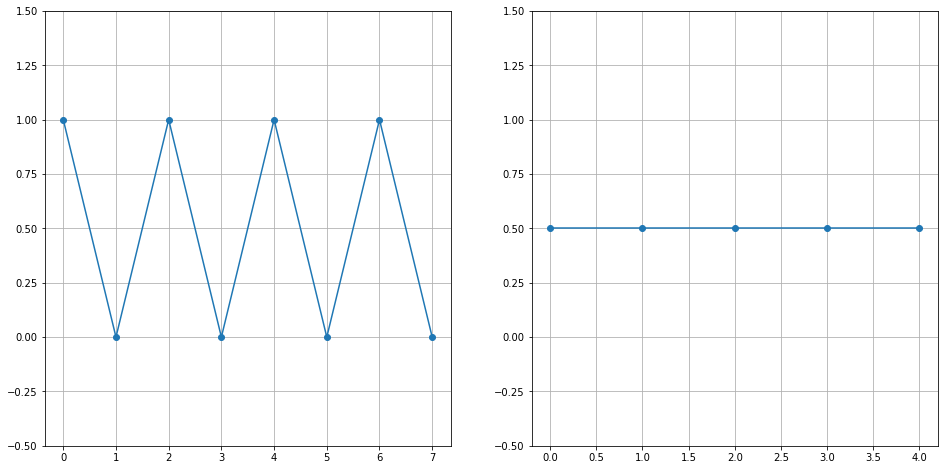

In [ ]:
_, axs = plt.subplots(1,2, figsize=(16,8))
for c,data in zip(axs, [x,y_valid]):
  c.grid('on')
  c.plot(data, marker='o')
  c.set_ylim([-.5,1.5])

print(f'amplitude of high freq. comp.: {np.round( (np.max(x)-np.min(x))/2 ,4)}')
print(f'amplitude of DC comp.        : {np.round( (np.max(x)+np.min(x))/2 ,4)}')

print(f'amplitude of high freq. comp.: {np.round( (np.max(y_valid)-np.min(y_valid))/2, 4)}')
print(f'amplitude of DC comp.        : {np.round( (np.max(y_valid)+np.min(y_valid))/2, 4)}')

print(f'gain of high freq. comp. :{np.round( (np.max(y_valid)-np.min(y_valid)) / (np.max(x)-np.min(x)), 4)}')
print(f'gain of DC comp.         :{np.round( (np.max(y_valid)+np.min(y_valid)) / (np.max(x)+np.min(x)), 4)}')

amplitude high freq.: 0.0
amplitude DC        : 0.5


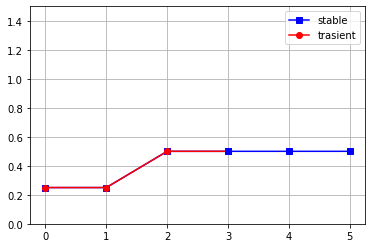

In [ ]:
f, ax = plt.subplots()

ax.plot(y_full[:len(y_full)-(len(h)+1)], marker='s', color='b', label='stable')
ax.plot(y_full[:len(h)], marker='o', color='r', label='trasient')
ax.plot([3],[.5],marker='s', color='b')
ax.grid('on')
ax.set_ylim(0.,1.5)
ax.legend()
print(f'amplitude high freq.: {np.round( (np.max(y_valid)-np.min(y_valid))/2 ,4)}')
print(f'amplitude DC        : {np.round( (np.max(y_valid)+np.min(y_valid))/2 ,4)}')

len of input signal :  8
[1 0 1 0 1 0 1 0]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
8 (8,) (8,)
[ 0.  1.  2.  3. -4. -3. -2. -1.]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j 4.+0.j 0.+0.j 0.+0.j 0.+0.j]
[4.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


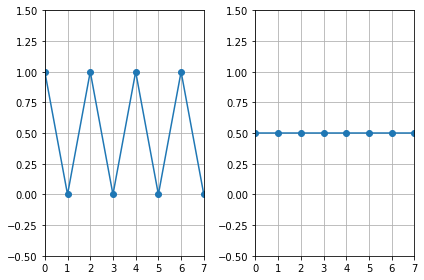

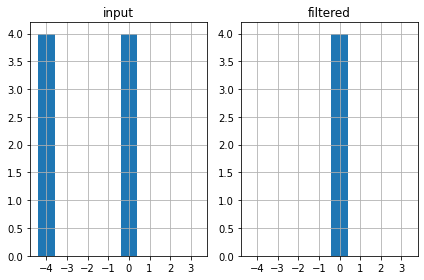

In [ ]:
# input
X = np.fft.fft(x)
print('len of input signal : ',len(x))
print(x)

# filtered
y = np.pad(y_valid,(0,len(x)-len(y_valid)),mode='symmetric')
Y = np.fft.fft(y)
print(y)

fig, axs = plt.subplots(1,2)
for c,data in zip(axs, [x,y]):
  c.grid('on')
  c.plot(data, marker='o')
  c.set_ylim([-.5,1.5])
  c.set_xlim([0,7])
  xticks= [i for i in range(len(x))]  
  c.set_xticks(xticks)

fig.tight_layout()
# DC ... High
freq = np.fft.fftfreq(len(X),1/len(X)) # n=window length, d=sample spacing

#--------------------------------
# fftshift
# -High, ... , DC, ... High-1
# X = np.fft.fftshift(X) 
# Y = np.fft.fftshift(Y)
# freq=np.fft.fftshift(np.fft.fftfreq(len(X), 1/8))

print(len(freq),X.shape,Y.shape)
fig,ax = plt.subplots(1,2)
ax[0].grid('on')
ax[1].grid('on')
ax[0].bar(freq,np.abs(X) , label='input')
ax[1].bar(freq,np.abs(Y) , label='filtered')
ax[0].set_title('input')
ax[1].set_title('filtered')
ax[0].set_xticks(freq)
ax[1].set_xticks(freq)
fig.tight_layout()
print(freq)
print(X)
print(Y)

<BarContainer object of 5 artists>

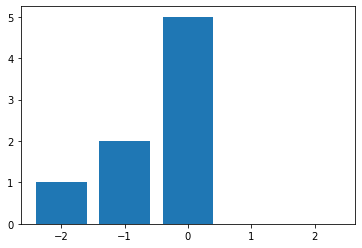

In [ ]:
t = [ 0,1,2,-1,-2]
f = [ 5,0,0,2,1]
_,ax = plt.subplots()
ax.bar(t,f)

In [ ]:
import numpy as np
h = np.ones((3))
h = 0.25*h
from scipy import fftpack
from scipy import signal

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

def draw_spectrum(k,Y, marker='o', label='', ax=None):
  if ax == None:
    f, ax = plt.subplots()
  k =  np.fft.fftshift(k)
  Y =  np.fft.fftshift(np.abs(Y))
  ax.plot(k /np.pi ,Y,marker=marker, label=label)
  ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
  ax.grid()
  return ax


(103,)
3.1110917540403773


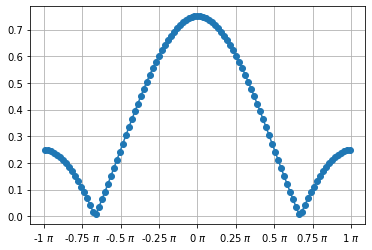

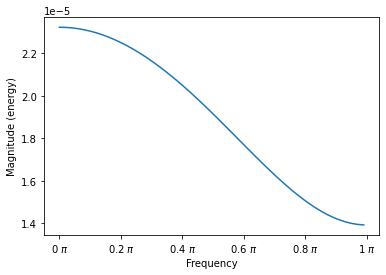

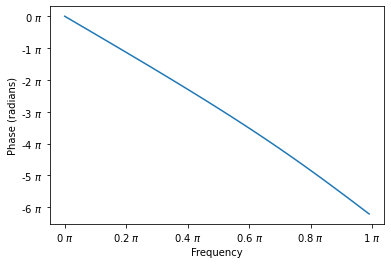

In [ ]:
p = np.zeros((100))
h_padded = np.concatenate((h,p),axis=-1)
print(h_padded.shape)

SAMPLE_RATE= 1 # Hz
DURATION = len(h_padded)-1 # sec

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION +1

# xf = np.fft.fftfreq(int(N), 1 / SAMPLE_RATE) # freq. (=cycle/sec)
xf = np.fft.fftfreq(N) # freq. (=cycle/sec)
w  = xf * np.pi *2 # angular freq (=rad/sec)
print(w.max())


H = np.fft.fft(h_padded)

draw_spectrum(w,H)

# fig, axs = plt.subplots(1,2,figsize=(10,5))
# # magnitude
# # axs[0].plot(w[0:len(H)//2], np.abs(H[0:len(H)//2]))
# axs[0].plot(w/np.pi, np.abs(H))
# axs[0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))

fig, ax = plt.subplots()
ax.magnitude_spectrum(h_padded, Fs=2)#, sides='twosided')
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))

# phase
H_phase = np.angle(H)
# H_phase = np.unwrap(H_phase)
# H_phase = np.where(H_phase>0.0001,H_phase-np.pi,H_phase+np.pi)
# H_phase = np.unwrap( H_phase)
# ax = draw_spectrum(w,H_phase/np.pi)
# ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
fig, ax = plt.subplots()
ax.phase_spectrum(h_padded/np.pi)#, sides='twosided')
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))

In [ ]:
from sympy import symbols, fourier_transform,Function, Symbol, init_printing, DiracDelta, exp,expand_complex
          
n, f = symbols('n f')

init_printing()

Fk = fourier_transform( 1/3*DiracDelta(n)+1/3*DiracDelta(n-1)+1/3*DiracDelta(n-2), n, f )
Fk

0.3333333333333333


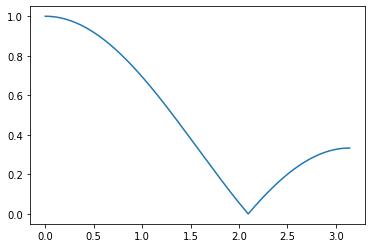

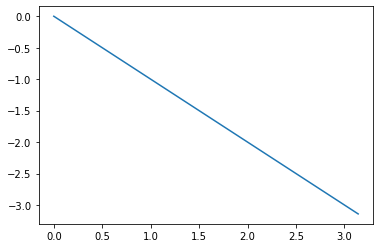

In [ ]:
w = np.linspace(0,np.pi,1000)
y = (1/3+2/3*np.cos(w))*np.exp(-1j*w)
plt.plot(w,np.abs(y))

phase = np.angle(y)
phase = np.where(phase>0,phase-6.283185307179586/2,phase)

plt.figure()
plt.plot(w,phase)
print(abs(y[-1]))


[-0.33333333  0.          0.33333333]
[0. 1. 0.]
[-0. -0.  0.]


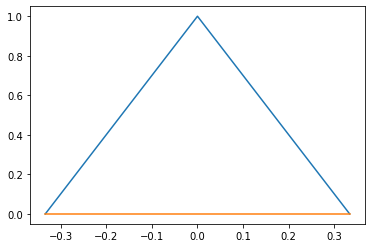

In [ ]:
from scipy.fft import fft,fftfreq
import numpy as np

SAMPLE_RATE= 1 #hz
DURATION = 3 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

h = np.array([1/3,1/3,1/3])
xf = np.fft.fftshift(fftfreq(N, 1 / SAMPLE_RATE))
print(xf)
print(np.abs())
print(np.angle(H))
H = np.fft.fftshift(fft(h))

import matplotlib.pyplot as plt
plt.plot(xf,np.abs(H), xf,np.angle(H),label=['mag','phase'])

In [ ]:
y2 = signal.convolve(x,h,mode='valid', method='direct')
y-y2

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def gen_ideal_samples(t, freqs, weights):
  ret_val = np.zeros(t.shape)
  for f,w in zip(freqs,weights):
    ret_val += w*np.cos( 2*np.pi * f * t)

  return ret_val
  
def add_gussian_noise(signal, std):
   ret_val = signal + std * np.random.randn(*np.shape(signal))
   return ret_val

# Specification of Input Signal 
* duration of signal ($T$) : 100 seconds
* 최대 주파수 ($f_\text{max}$) : 60 Hz
* 샘플링 주파수 ($f_s$) : 120 Hz (=$2\times f_\text{max}$)
* number of samples ($N=T\times f_s$) : 12000 
* the resolution of frequency spectrum $\left(\Delta f = \frac{f_s}{N} = \frac{1}{T}\right)$ : 0.01 Hz

## signal
* 1, 10, 30 Hz 
* 5, 3, 1 weights (or amplitude)

## noise
* $\sigma = 5$



In [ ]:
T = 100
B = 60
f_s = B*2
N = int(T * f_s)
d_f = f_s / N
sigma = 1

print(f'f_sampling={f_s}Hz')
t = np.linspace(0,T,N)
x_time = gen_ideal_samples(t,[1],[5])
x_time_w_noise = add_gussian_noise(x_time,sigma)

f_sampling=120Hz


Text(0.5, 0, 'time (s)')

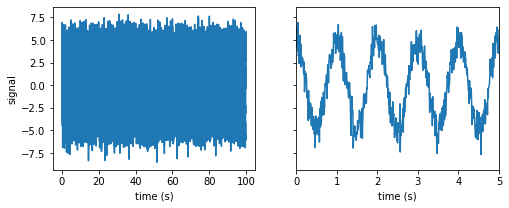

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].plot(t, x_time_w_noise)
axes[0].set_xlabel("time (s)")
axes[0].set_ylabel("signal")

axes[1].plot(t, x_time_w_noise)
axes[1].set_xlim(0, 5)
axes[1].set_xlabel("time (s)")

In [ ]:
cutoff = 5
nyq = B
n = 101

b = signal.firwin(n, cutoff=cutoff, nyq=B, window="hamming")
print(len(b))

101


In [ ]:
f, h = signal.freqz(b)

f = f*f_s/(np.pi)

In [ ]:
min(f)

0.0

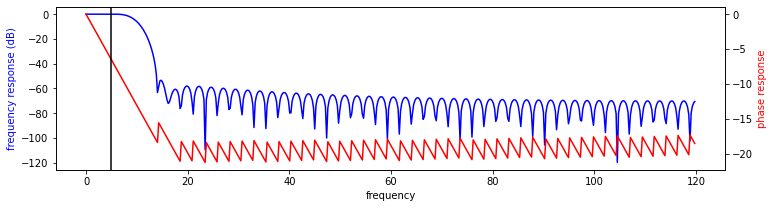

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
h_ampl = 20 * np.log10(abs(h))
h_phase = np.unwrap(np.angle(h))

# ax.plot(f/max(f), h_ampl, 'b')
ax.plot(f, h_ampl, 'b')
# ax.set_ylim(-150, 5)
ax.set_ylabel('frequency response (dB)', color="b")
# ax.set_xlabel(r'normalized frequency')
ax.set_xlabel(r'frequency')
ax = ax.twinx()
# ax.plot(f/max(f), h_phase, 'r')
ax.plot(f, h_phase, 'r')
ax.set_ylabel('phase response', color="r")
ax.axvline(cutoff, color="black")

In [ ]:
x_filt = signal.lfilter(b, 1, x_time_w_noise)

In [ ]:
_, d = signal.group_delay((b,1),w=1,fs=f_s)
d

array([50.])

0.008333333333333333 120.0


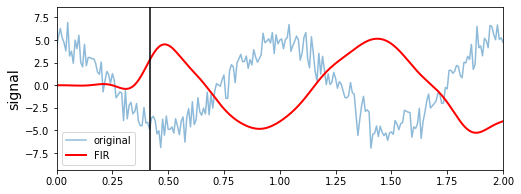

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, x_time_w_noise, label="original", alpha=0.5)
ax.plot(t, x_filt, color="red", lw=2, label="FIR")
ax.set_ylabel("signal", fontsize=14)
ax.legend(loc=0)
ax.set_xlim(0,2)

dt = T/N
print(dt,1/dt)
delay = d[0]*dt
ax.axvline(delay, color="black")

In [ ]:
b,a = signal.iirfilter(2, cutoff, fs=f_s,btype='lowpass')
print(f'{len(b)},{len(a)}')

3,3


In [ ]:
f, h = signal.freqz(b,a)

f = f*f_s/(np.pi)

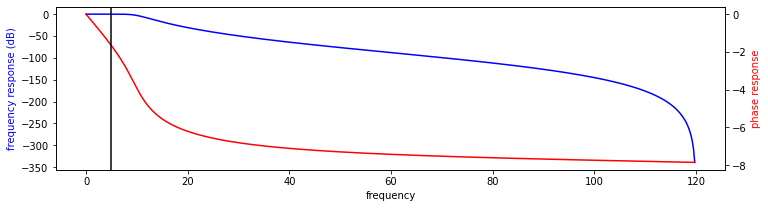

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
h_ampl = 20 * np.log10(abs(h))
h_phase = np.unwrap(np.angle(h))

# ax.plot(f/max(f), h_ampl, 'b')
ax.plot(f, h_ampl, 'b')
# ax.set_ylim(-150, 5)
ax.set_ylabel('frequency response (dB)', color="b")
# ax.set_xlabel(r'normalized frequency')
ax.set_xlabel(r'frequency')
ax = ax.twinx()
# ax.plot(f/max(f), h_phase, 'r')
ax.plot(f, h_phase, 'r')
ax.set_ylabel('phase response', color="r")
ax.axvline(cutoff, color="black")

In [ ]:
x_filt = signal.lfilter(b, a, x_time_w_noise)

(0.0, 2.0)

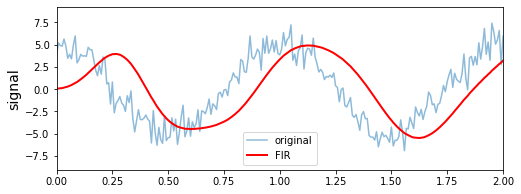

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, x_time_w_noise, label="original", alpha=0.5)
ax.plot(t, x_filt, color="red", lw=2, label="FIR")
ax.set_ylabel("signal", fontsize=14)
ax.legend(loc=0)
ax.set_xlim(0,2)


In [ ]:
b,a = signal.iirdesign(cutoff-2, cutoff+2,1,40, fs=f_s)
print(f'{len(b)},{len(a)}')

5,5


In [ ]:
f, h = signal.freqz(b,a)

f = f*f_s/(np.pi)

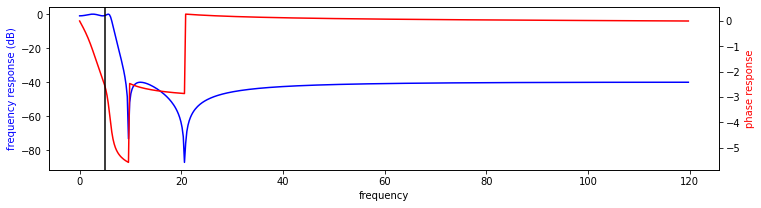

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
h_ampl = 20 * np.log10(abs(h))
h_phase = np.unwrap(np.angle(h))

# ax.plot(f/max(f), h_ampl, 'b')
ax.plot(f, h_ampl, 'b')
# ax.set_ylim(-150, 5)
ax.set_ylabel('frequency response (dB)', color="b")
# ax.set_xlabel(r'normalized frequency')
ax.set_xlabel(r'frequency')
ax = ax.twinx()
# ax.plot(f/max(f), h_phase, 'r')
ax.plot(f, h_phase, 'r')
ax.set_ylabel('phase response', color="r")
ax.axvline(cutoff, color="black")

In [ ]:
x_filt = signal.lfilter(b, a, x_time_w_noise)

(0.0, 2.0)

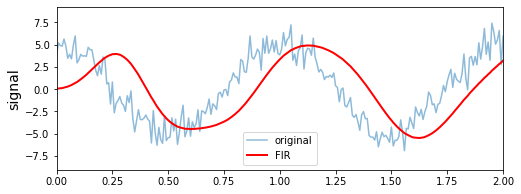

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, x_time_w_noise, label="original", alpha=0.5)
ax.plot(t, x_filt, color="red", lw=2, label="FIR")
ax.set_ylabel("signal", fontsize=14)
ax.legend(loc=0)
ax.set_xlim(0,2)